In [1]:
import sqlite3

# Connect to or create the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Insert sample data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.5),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0),
    ('Orange', 10, 1.5)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Commit and close
conn.commit()
conn.close()

print("Sample sales data inserted successfully.")


Sample sales data inserted successfully.


Sales Summary:
  product  total_qty  revenue
0   Apple         45    112.5
1  Banana         90     90.0
2  Orange         75    112.5


<Figure size 800x600 with 0 Axes>

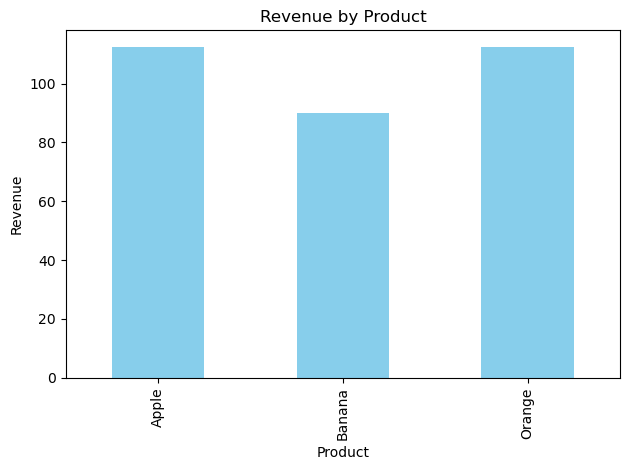

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')

# Run SQL query to get total quantity and revenue by product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

# Load query results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Print the summary
print("Sales Summary:")
print(df)

# Plot bar chart for revenue by product
plt.figure(figsize=(8, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save the chart as an image (optional)
plt.savefig("sales_chart.png")
plt.show()
